# Практика визуализации данных - датасет Open Food Facts

## Добро пожаловать на практическое занятие!

После изучения различных техник визуализации на лекции с датасетом Iris, пришло время применить эти навыки к реальному датасету. Сегодня мы будем работать с датасетом **Open Food Facts** - коллаборативной базой данных пищевых продуктов со всего мира.

### Цели обучения:
- Применить техники визуализации, изученные на лекции
- Работать с большим, более сложным реальным датасетом
- Практиковать очистку и предобработку данных
- Создавать осмысленные выводы из данных пищевой промышленности

### О датасете Open Food Facts:
База данных Open Food Facts содержит информацию о пищевых продуктах, включая:
- **Пищевую ценность** (калории, белки, жиры, углеводы)
- **Категории продуктов** (напитки, закуски, молочные продукты и т.д.)
- **Ингредиенты и добавки**
- **Nutri-Score** (рейтинг пищевой ценности A-E)
- **Географическую информацию** (страны, бренды)

### Источник датасета:
- **URL:** https://world.openfoodfacts.org/
- **Файл:** en.openfoodfacts.org.products.tsv
- **Формат:** Значения, разделенные табуляцией (TSV)
- **Размер:** Несколько сотен тысяч продуктов

### Что вы будете практиковать:
1. **Загрузка и исследование данных** - Понимание структуры датасета
2. **Базовая визуализация** - Диаграммы рассеяния, гистограммы, коробчатые диаграммы
3. **Продвинутые техники** - Многомерный анализ, корреляции
4. **Реальные выводы** - Анализ питания, сравнение брендов

## Настройка - Импорт библиотек

**Инструкции:** Выполните ячейку ниже для импорта всех необходимых библиотек для нашего анализа. Это те же библиотеки, которые мы использовали на лекции, плюс несколько дополнительных для работы с большими датасетами.

In [ ]:
# Импорт основных библиотек для анализа данных и визуализации
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

import warnings
warnings.filterwarnings("ignore")
plt.style.use('default')
sns.set_palette("husl")

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

print("Все библиотеки успешно импортированы!")
print("Готовы начать практику визуализации данных!")

Все библиотеки успешно импортированы!
Готовы начать практику визуализации данных!


## Упражнение 1: Загрузка данных и первичное исследование

### Инструкции:
1. **Скачайте датасет** с https://world.openfoodfacts.org/ (en.openfoodfacts.org.products.tsv)
2. **Поместите файл** в ту же директорию, что и этот блокнот
3. **Загрузите данные** используя pandas (файл разделен табуляцией, используйте `sep='\t'`)
4. **Исследуйте базовые свойства** датасета

### Ваши задачи:
- Загрузить датасет в pandas DataFrame
- Отобразить первые несколько строк
- Проверить форму (количество строк и столбцов)
- Посмотреть на названия столбцов и типы данных
- Выявить пропущенные значения

In [ ]:
import pandas as pd

df = pd.read_csv(
    "en.openfoodfacts.org.products.csv",
    sep="\t",
    low_memory=False,
    on_bad_lines="skip",
    nrows=100000
)

print(f"Размер датасета: {df.shape}")
df.head()


Размер датасета: (100000, 214)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,carbohydrates-total_100g
0,2,http://world-en.openfoodfacts.org/product/0000...,moon-rabbit,1759480700,2025-10-03T08:38:20Z,1759480703,2025-10-03T08:38:23Z,moon-rabbit,1759480703,2025-10-03T08:38:23Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1752485388,2025-07-14T09:29:48Z,1752485389,2025-07-14T09:29:49Z,NaN,1752485389,2025-07-14T09:29:49Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,http://world-en.openfoodfacts.org/product/0000...,elcoco,1560176426,2019-06-10T14:20:26Z,1748094869,2025-05-24T13:54:29Z,smoothie-app,1748094869,2025-05-24T13:54:29Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1754314021,2025-08-04T13:27:01Z,1754314023,2025-08-04T13:27:03Z,NaN,1754314023,2025-08-04T13:27:03Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,http://world-en.openfoodfacts.org/product/0000...,maldan,1732037972,2024-11-19T17:39:32Z,1749357659,2025-06-08T04:40:59Z,smoothie-app,1749357659,2025-06-08T04:40:59Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Упражнение 2: Очистка данных и предобработка

### Инструкции:
После загрузки датасета вы заметите, что в нем много столбцов и пропущенных значений. Давайте сосредоточимся на данных о пищевой ценности для нашего анализа.

### Ключевые столбцы для анализа:
- `product_name` - Название продукта
- `categories` - Категории продукта
- `countries` - Страны, где продается
- `energy_100g` - Энергия на 100г (ккал)
- `proteins_100g` - Белки на 100г
- `carbohydrates_100g` - Углеводы на 100г
- `fat_100g` - Жиры на 100г
- `sugars_100g` - Сахара на 100г
- `sodium_100g` - Натрий на 100г
- `nutriscore_grade` - Пищевая оценка (A, B, C, D, E)

### Ваши задачи:
1. Выберите только релевантные столбцы для анализа
2. Удалите строки с отсутствующими данными о питании
3. Создайте чистый датасет для визуализации
4. Изучите распределение оценок Nutri-Score

In [2]:
# TODO: Очистка данных и предобработка

import pandas as pd

nutritional_columns = [
    'product_name', 'categories', 'countries',
    'energy_100g', 'proteins_100g', 'carbohydrates_100g', 
    'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'
]

df_nutrition = pd.read_csv(
    "en.openfoodfacts.org.products.csv",
    sep="\t",
    usecols=nutritional_columns,
    low_memory=False,
    on_bad_lines="skip",
    nrows=200000
)

print(f"До очистки: {df_nutrition.shape}")

df_clean = df_nutrition.dropna(subset=nutritional_columns[3:])
print(f"После удаления NaN: {df_clean.shape}")

for col in ['energy_100g','proteins_100g','carbohydrates_100g','fat_100g','sugars_100g','sodium_100g']:
    df_clean = df_clean[(df_clean[col] >= 0) & (df_clean[col] <= 1000)]

print(f"После фильтрации выбросов: {df_clean.shape}")

print("Распределение Nutri-Score:")
print(df_clean['nutriscore_grade'].value_counts())

df_clean.head()

До очистки: (200000, 10)
После удаления NaN: (144521, 10)
После фильтрации выбросов: (61122, 10)
Распределение Nutri-Score:
nutriscore_grade
unknown           21807
a                 12627
c                  9755
b                  7039
d                  5321
e                  4218
not-applicable      355
Name: count, dtype: int64


,product_name,categories,countries,nutriscore_grade,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g
6,granola Bio le Chocolaté,"Aliments et boissons à base de végétaux, Alime...","Spanien, Germany",c,4.0,1.00,1.0,1.00,1.00,0.4000
9,xytitol pastilles,"it:Gestione sovrappeso, it:obesità, Wrap","Germany,Spain",a,293.0,0.50,2.0,0.24,18.00,0.1100
13,Powdered peanut butter,"Snacks, Meals, Rice dishes, Risottos, Powder p...",en:Switzerland,c,188.0,13.00,15.0,3.60,11.00,0.0250
16,Collagen For Her,NaN,"Ireland, en:france",unknown,517.0,1.76,24.7,0.00,1.76,0.0353
29,Lindt Vollmilch Schokolade,"Dried products, Dried products to be rehydrate...","Frankreich, Germany",unknown,26.0,0.30,0.5,0.20,0.30,0.3200


## Упражнение 3: Базовая визуализация - Применение техник из лекции

Теперь давайте применим техники визуализации, которые вы изучили на лекции! Мы начнем с простых графиков и постепенно увеличим сложность.

### Упражнение 3a: Диаграммы рассеяния - Энергия против содержания белка

**Цель:** Создать диаграмму рассеяния для исследования взаимосвязи между энергетической ценностью и содержанием белка в продуктах.

**Инструкции:**
1. Создайте базовую диаграмму рассеяния используя метод `.plot()` из pandas
2. Создайте улучшенную версию используя `scatterplot()` из seaborn
3. Добавьте цветовое кодирование по оценке Nutri-Score
4. Интерпретируйте результаты: Какие паттерны вы видите?

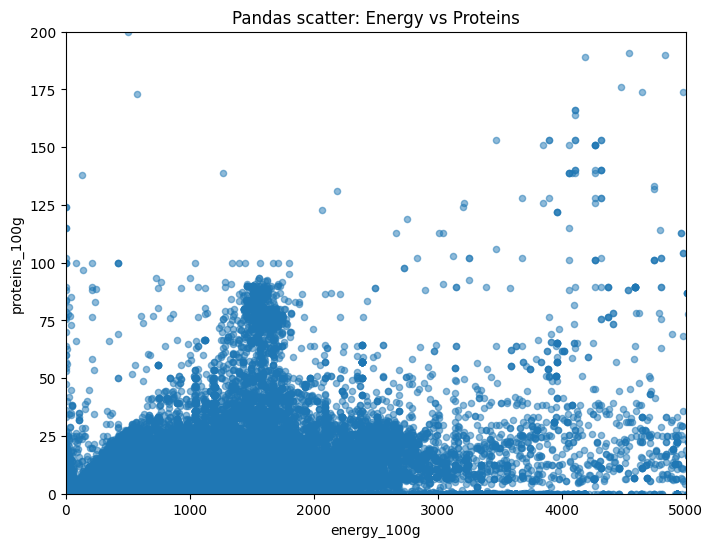

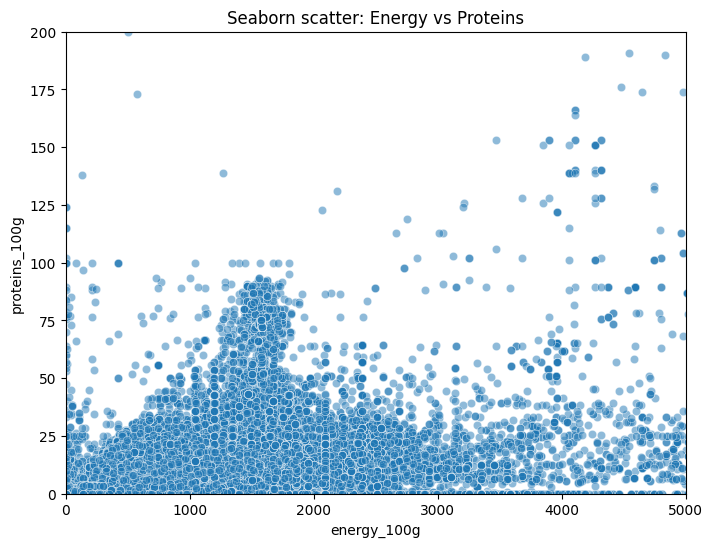

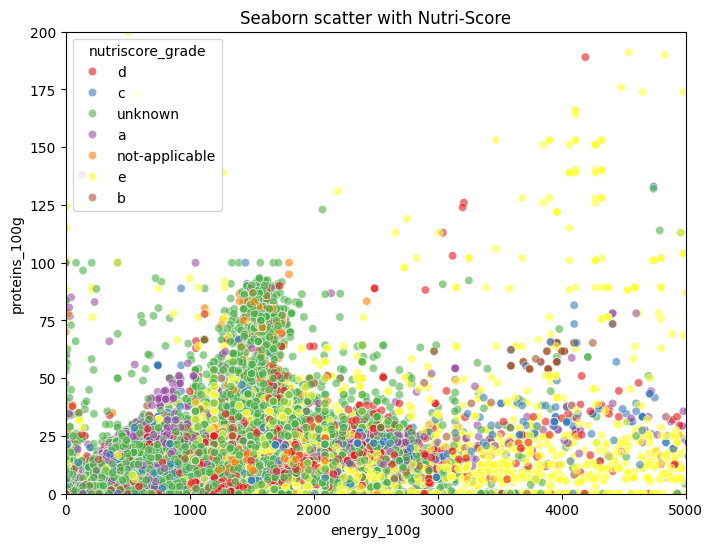

Цели упражнения 3a:
1. Создать базовую диаграмму рассеяния pandas
2. Улучшить с помощью seaborn и цветового кодирования
3. Проанализировать паттерны между энергией и белком
4. Наблюдать как Nutri-Score связан с пищевой ценностью


In [7]:
# Упражнение 3a: Диаграммы рассеяния
# TODO: Реализуйте когда датасет загружен

import matplotlib.pyplot as plt
import seaborn as sns

df.plot(kind="scatter", x="energy_100g", y="proteins_100g", alpha=0.5, figsize=(8,6))
plt.xlim(0, 5000)
plt.ylim(0, 200)
plt.title("Pandas scatter: Energy vs Proteins")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="energy_100g", y="proteins_100g", alpha=0.5)
plt.xlim(0, 5000)
plt.ylim(0, 200)
plt.title("Seaborn scatter: Energy vs Proteins")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="energy_100g", y="proteins_100g", hue="nutriscore_grade", alpha=0.6, palette="Set1")
plt.xlim(0, 5000)
plt.ylim(0, 200)
plt.title("Seaborn scatter with Nutri-Score")
plt.show()



print("Цели упражнения 3a:")
print("1. Создать базовую диаграмму рассеяния pandas")
print("2. Улучшить с помощью seaborn и цветового кодирования")
print("3. Проанализировать паттерны между энергией и белком")
print("4. Наблюдать как Nutri-Score связан с пищевой ценностью")

### Упражнение 3b: Коробчатые диаграммы - Распределение питательных веществ по Nutri-Score

**Цель:** Использовать коробчатые диаграммы для сравнения пищевой ценности между различными оценками Nutri-Score.

**Инструкции:**
1. Создайте коробчатые диаграммы для энергетической ценности по оценке Nutri-Score
2. Создайте коробчатые диаграммы для содержания сахара по оценке Nutri-Score
3. Попробуйте комбинированную технику коробчатая диаграмма + strip plot из лекции
4. Сравните результаты: Как различаются пищевые показатели по оценкам A-E?

C:\Users\Юзер\AppData\Local\Temp\ipykernel_34724\600821551.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="nutriscore_grade", y="energy_100g", palette="Set2")
C:\Users\Юзер\AppData\Local\Temp\ipykernel_34724\600821551.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="nutriscore_grade", y="sugars_100g", palette="Set3")


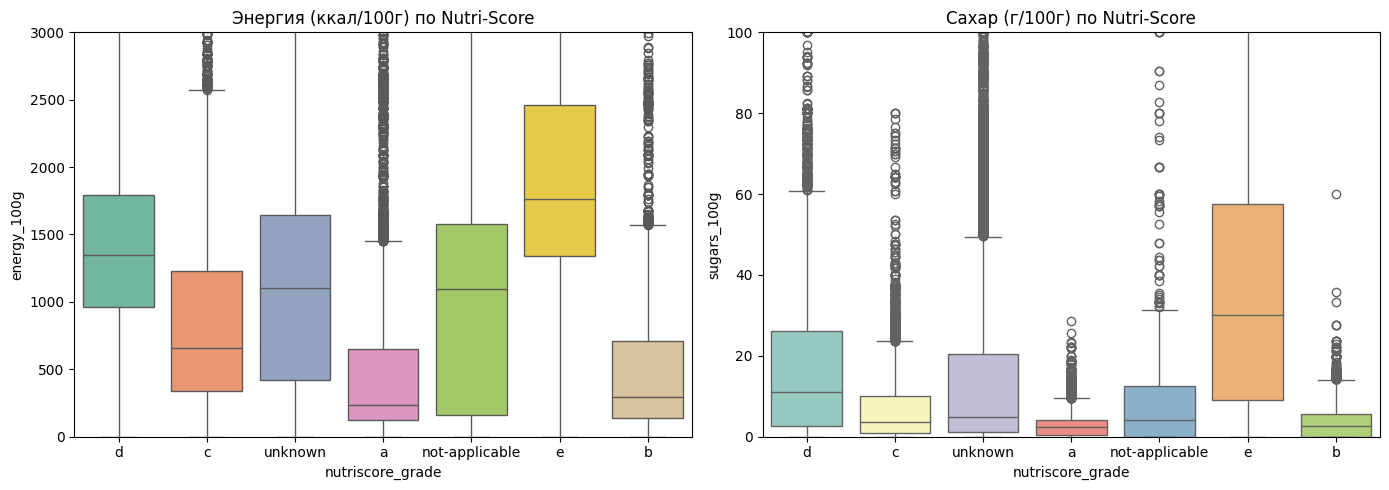

C:\Users\Юзер\AppData\Local\Temp\ipykernel_34724\600821551.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="nutriscore_grade", y="sugars_100g", palette="pastel")


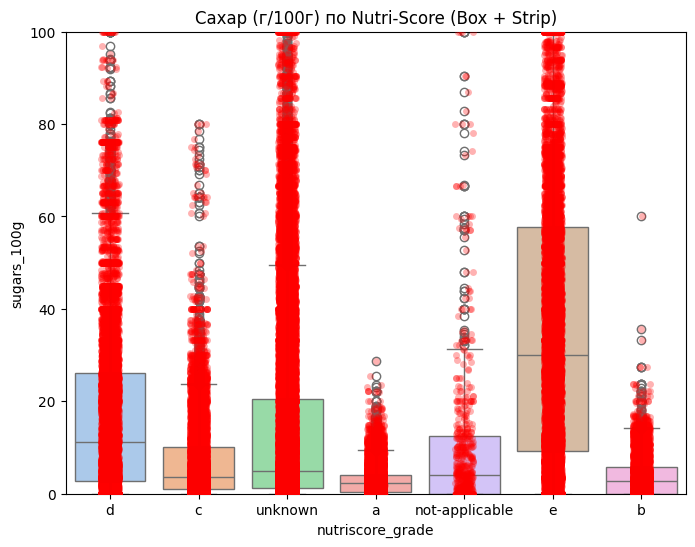

Цели упражнения 3b:
1. Сравнить энергию по оценкам Nutri-Score
2. Проанализировать паттерны содержания сахара
3. Применить комбинированные техники визуализации
4. Интерпретировать что делает продукты более/менее здоровыми


In [10]:
# Упражнение 3b: Коробчатые диаграммы
# TODO: Реализуйте когда датасет загружен

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="nutriscore_grade", y="energy_100g", palette="Set2")
plt.title("Энергия (ккал/100г) по Nutri-Score")
plt.ylim(0, 3000)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="nutriscore_grade", y="sugars_100g", palette="Set3")
plt.title("Сахар (г/100г) по Nutri-Score")
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="nutriscore_grade", y="sugars_100g", palette="pastel")
sns.stripplot(data=df, x="nutriscore_grade", y="sugars_100g", color="red", alpha=0.3, jitter=True)
plt.title("Сахар (г/100г) по Nutri-Score (Box + Strip)")
plt.ylim(0, 100)
plt.show()


print("Цели упражнения 3b:")
print("1. Сравнить энергию по оценкам Nutri-Score")
print("2. Проанализировать паттерны содержания сахара")
print("3. Применить комбинированные техники визуализации")
print("4. Интерпретировать что делает продукты более/менее здоровыми")

### Упражнение 3c: Скрипичные диаграммы и KDE - Анализ распределений

**Цель:** Использовать скрипичные диаграммы и KDE для анализа формы распределений питательных веществ.

**Инструкции:**
1. Создайте скрипичные диаграммы для содержания жиров по оценке Nutri-Score
2. Используйте KDE графики для сравнения распределений белка по оценкам
3. Экспериментируйте с обеими техниками и сравните их выводы
4. Определите какие продукты имеют необычные пищевые профили

C:\Users\Юзер\AppData\Local\Temp\ipykernel_34724\3715428128.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="nutriscore_grade", y="fat_100g", palette="muted", inner="quartile")


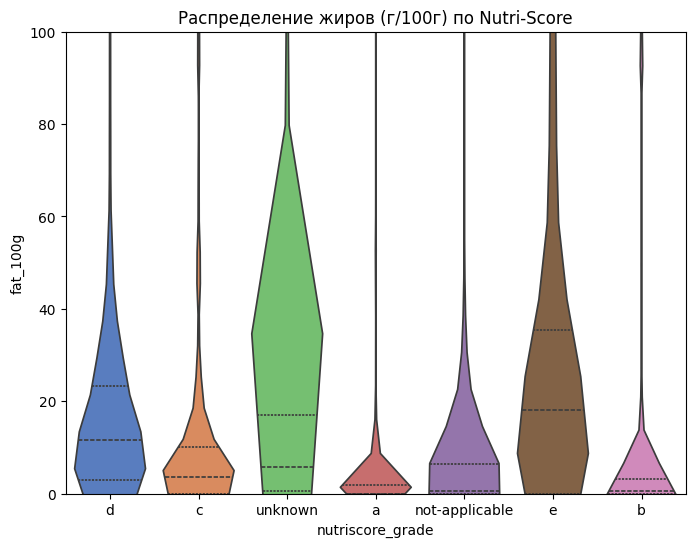

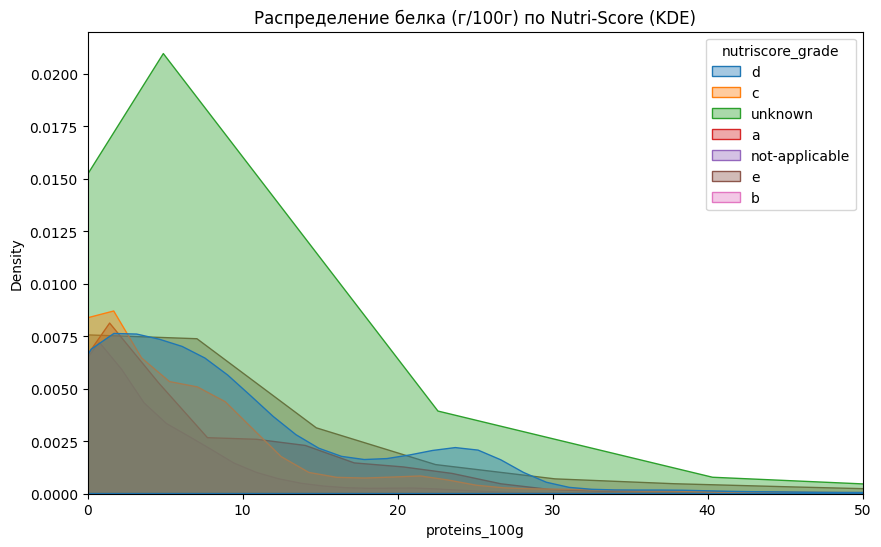

C:\Users\Юзер\AppData\Local\Temp\ipykernel_34724\3715428128.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="nutriscore_grade", y="proteins_100g", palette="pastel", inner=None)


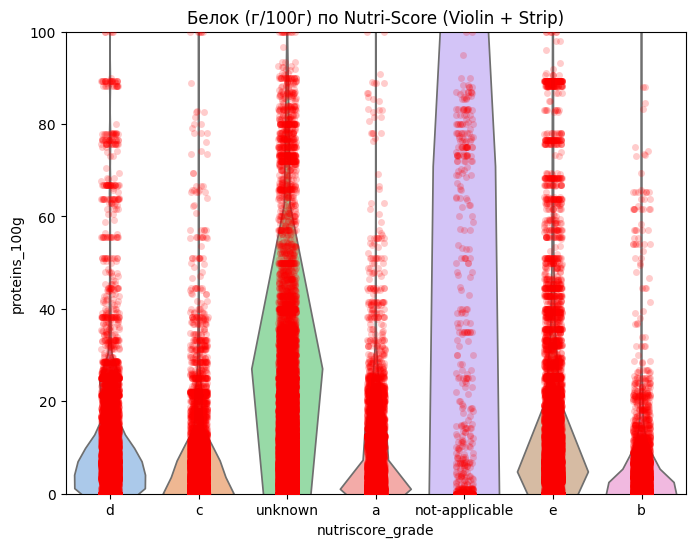

Цели упражнения 3c:
1. Исследовать распределения содержания жиров
2. Сравнить паттерны белка используя KDE
3. Выявить мультимодальные распределения
4. Понять различия форм между оценками


In [13]:
# Упражнение 3c: Скрипичные диаграммы и KDE
# TODO: Реализуйте когда датасет загружен

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="nutriscore_grade", y="fat_100g", palette="muted", inner="quartile")
plt.title("Распределение жиров (г/100г) по Nutri-Score")
plt.ylim(0, 100)
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="proteins_100g", hue="nutriscore_grade", fill=True, alpha=0.4)
plt.title("Распределение белка (г/100г) по Nutri-Score (KDE)")
plt.xlim(0, 50)
plt.show()

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="nutriscore_grade", y="proteins_100g", palette="pastel", inner=None)
sns.stripplot(data=df, x="nutriscore_grade", y="proteins_100g", color="red", alpha=0.2, jitter=True)
plt.title("Белок (г/100г) по Nutri-Score (Violin + Strip)")
plt.ylim(0, 100)
plt.show()


print("Цели упражнения 3c:")
print("1. Исследовать распределения содержания жиров")
print("2. Сравнить паттерны белка используя KDE")
print("3. Выявить мультимодальные распределения")
print("4. Понять различия форм между оценками")

## Упражнение 4: Продвинутый многомерный анализ

### Упражнение 4a: Парные графики - Взаимосвязи питательных веществ

**Цель:** Использовать парные графики для исследования взаимосвязей между всеми пищевыми переменными одновременно.

**Инструкции:**
1. Создайте парный график для основных пищевых компонентов (энергия, белок, углеводы, жиры)
2. Используйте цветовое кодирование по оценке Nutri-Score
3. Попробуйте и гистограмму, и KDE на диагонали
4. Определите наиболее сильные корреляции и наиболее разделимые питательные вещества

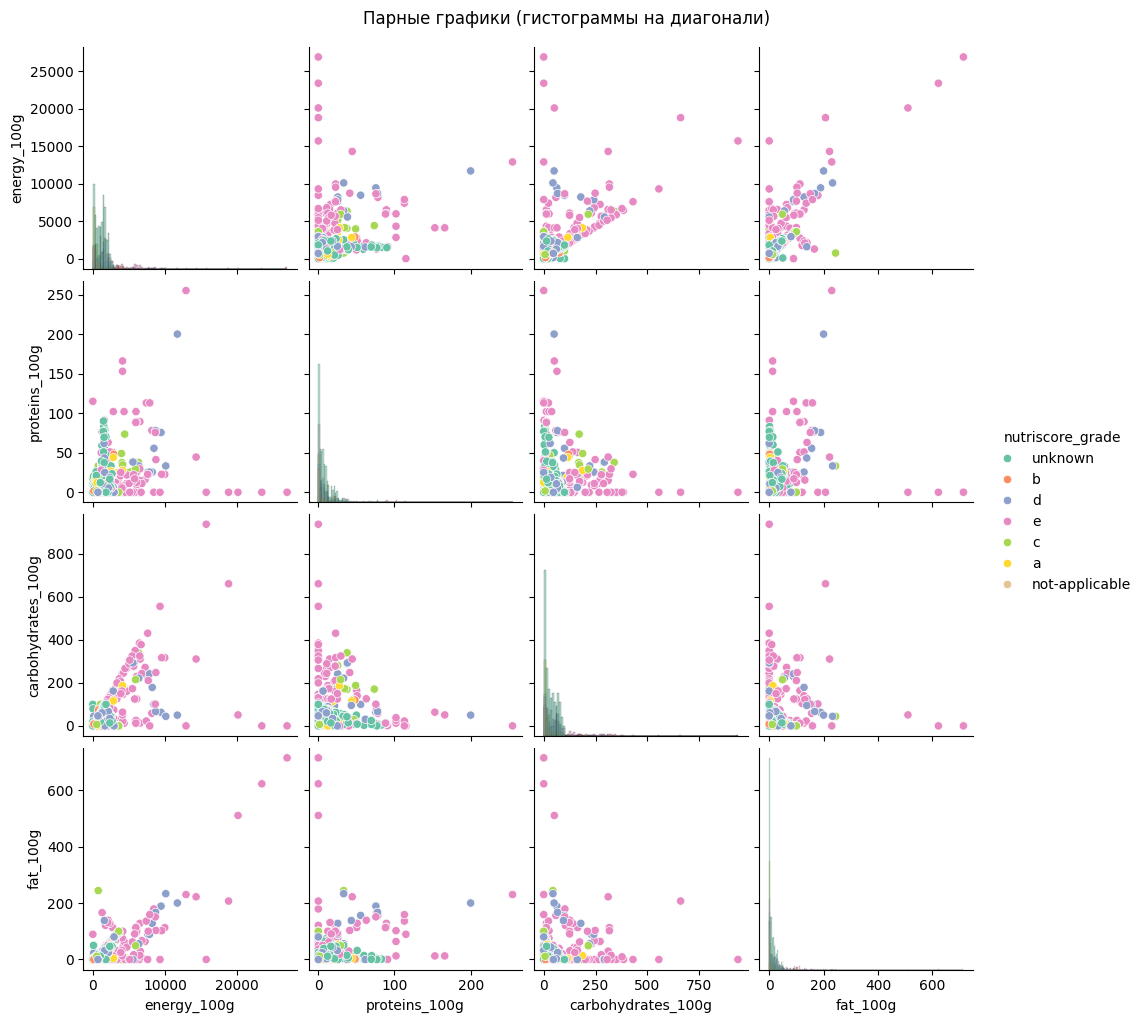

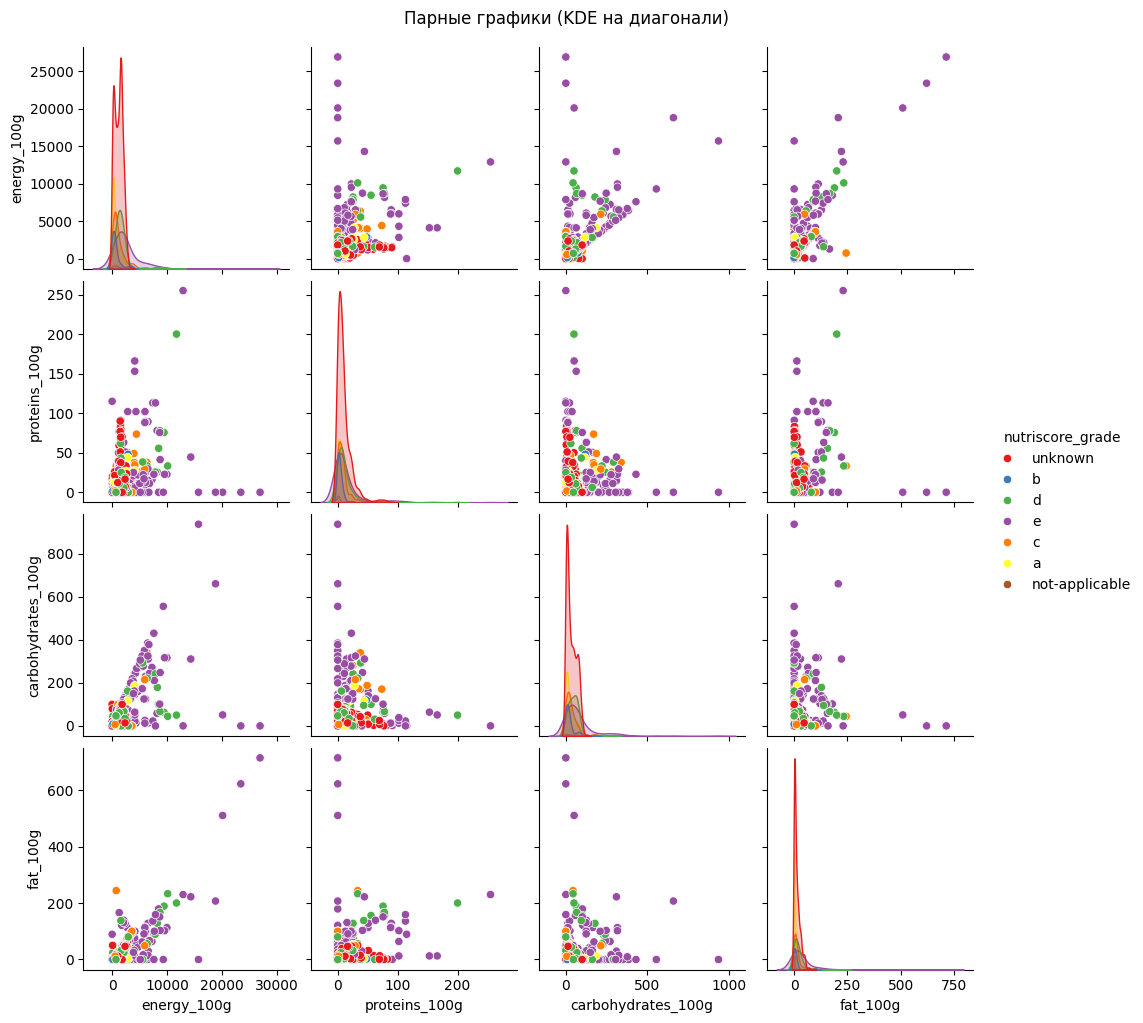

Цели упражнения 4a:
1. Проанализировать все пищевые взаимосвязи одновременно
2. Определить наиболее сильные корреляции
3. Сравнить гистограмму против KDE на диагонали
4. Найти какие питательные вещества лучше всего разделяют оценки Nutri-Score


In [ ]:
# Упражнение 4a: Парные графики
# TODO: Реализуйте когда датасет загружен

import seaborn as sns
import matplotlib.pyplot as plt

df_sample = df.sample(2000, random_state=42)

cols = ["energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g"]

sns.pairplot(df_sample[cols + ["nutriscore_grade"]], hue="nutriscore_grade", diag_kind="hist", palette="Set2")
plt.suptitle("Парные графики (гистограммы на диагонали)", y=1.02)
plt.show()

sns.pairplot(df_sample[cols + ["nutriscore_grade"]], hue="nutriscore_grade", diag_kind="kde", palette="Set1")
plt.suptitle("Парные графики (KDE на диагонали)", y=1.02)
plt.show()


print("Цели упражнения 4a:")
print("1. Проанализировать все пищевые взаимосвязи одновременно")
print("2. Определить наиболее сильные корреляции")
print("3. Сравнить гистограмму против KDE на диагонали")
print("4. Найти какие питательные вещества лучше всего разделяют оценки Nutri-Score")

### Упражнение 4b: Продвинутые многомерные техники

**Цель:** Применить сложные методы визуализации из лекции: Кривые Эндрюса, Параллельные координаты и RadViz.

**Инструкции:**
1. Используйте Кривые Эндрюса для визуализации пищевых паттернов
2. Создайте график Параллельные координаты для профилей питательных веществ
3. Примените RadViz для просмотра кластеризации питательных веществ
4. Сравните выводы от каждого метода

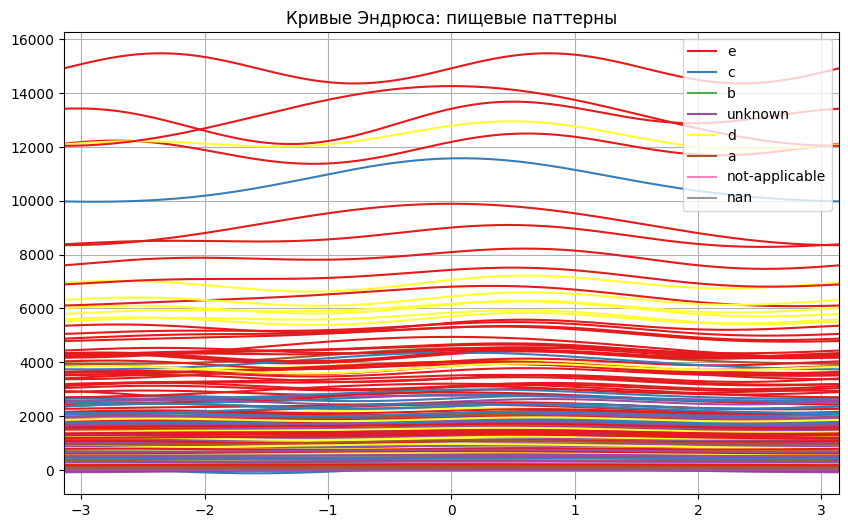

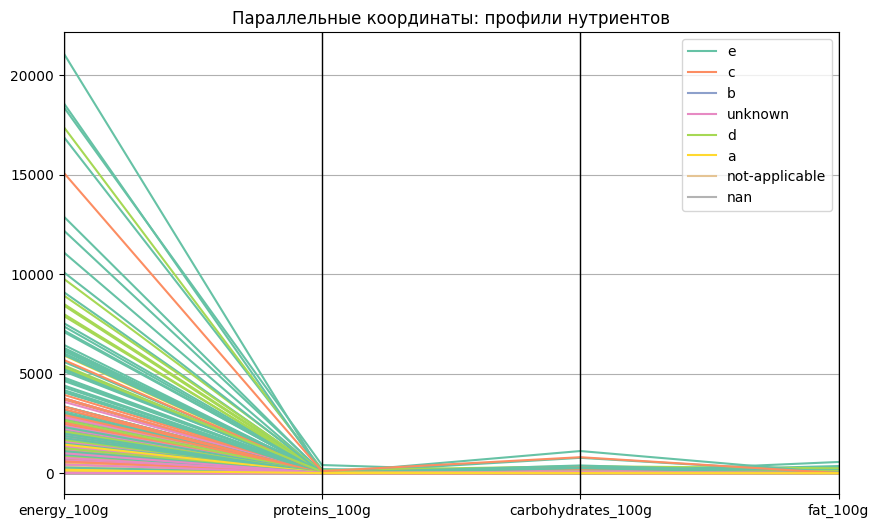

C:\Users\Юзер\AppData\Roaming\Python\Python312\site-packages\pandas\plotting\_matplotlib\misc.py:178: RuntimeWarning: invalid value encountered in divide
  y = (s * row_).sum(axis=0) / row.sum()


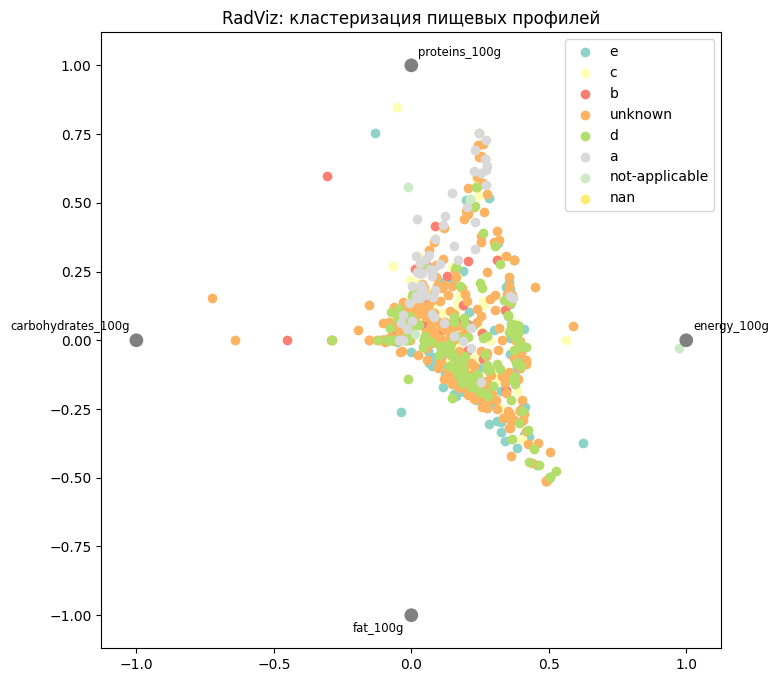

Цели упражнения 4b:
1. Применить Кривые Эндрюса для поиска пищевых паттернов
2. Использовать Параллельные координаты для сравнения профилей
3. Исследовать кластеризацию RadViz похожих продуктов
4. Сравнить выводы от каждого продвинутого метода


In [16]:
# Упражнение 4b: Продвинутые многомерные техники
# TODO: Реализуйте когда датасет загружен

# Подготовьте данные для продвинутых визуализаций
# df_advanced = df_nutrition.sample(1000, random_state=42)  # Выборка для производительности

from pandas.plotting import andrews_curves, parallel_coordinates, radviz

df_advanced = df_nutrition.sample(1000, random_state=42)

plt.figure(figsize=(10,6))
andrews_curves(df_advanced[cols + ["nutriscore_grade"]], "nutriscore_grade", colormap="Set1")
plt.title("Кривые Эндрюса: пищевые паттерны")
plt.show()

plt.figure(figsize=(10,6))
parallel_coordinates(df_advanced[cols + ["nutriscore_grade"]], "nutriscore_grade", colormap="Set2")
plt.title("Параллельные координаты: профили нутриентов")
plt.show()

plt.figure(figsize=(8,8))
radviz(df_advanced[cols + ["nutriscore_grade"]], "nutriscore_grade", colormap="Set3")
plt.title("RadViz: кластеризация пищевых профилей")
plt.show()


print("Цели упражнения 4b:")
print("1. Применить Кривые Эндрюса для поиска пищевых паттернов")
print("2. Использовать Параллельные координаты для сравнения профилей")
print("3. Исследовать кластеризацию RadViz похожих продуктов")
print("4. Сравнить выводы от каждого продвинутого метода")

## Упражнения-вызовы

Готовы к более продвинутым вызовам? Эти упражнения проверят ваше понимание и креативность!

### Вызов 1: Анализ категорий
**Задача:** Проанализируйте как пищевая ценность варьируется между различными категориями продуктов.
- Извлеките и очистите столбец `categories`
- Создайте визуализации, сравнивающие основные категории продуктов
- Найдите какие категории имеют лучшие/худшие пищевые профили

### Вызов 2: Географический анализ  
**Задача:** Исследуйте пищевые различия между странами.
- Разберите столбец `countries`  
- Сравните пищевые стандарты между различными регионами
- Определите страны с самыми здоровыми пищевыми продуктами

### Вызов 3: Собственные выводы
**Задача:** Найдите свой собственный интересный паттерн в данных.
- Выберите аспект данных, который вас интересует
- Примените множественные техники визуализации
- Представьте убедительную историю о ваших находках

### Вызов 4: Интерактивная панель
**Задача:** Создайте интерактивную визуализацию (если знаете Plotly/Bokeh).
- Разрешите фильтрацию по категории, стране или Nutri-Score
- Включите масштабирование и наведение для деталей
- Сделайте это полезным для анализа пищевой промышленности

Вызов 1: Анализ категорий


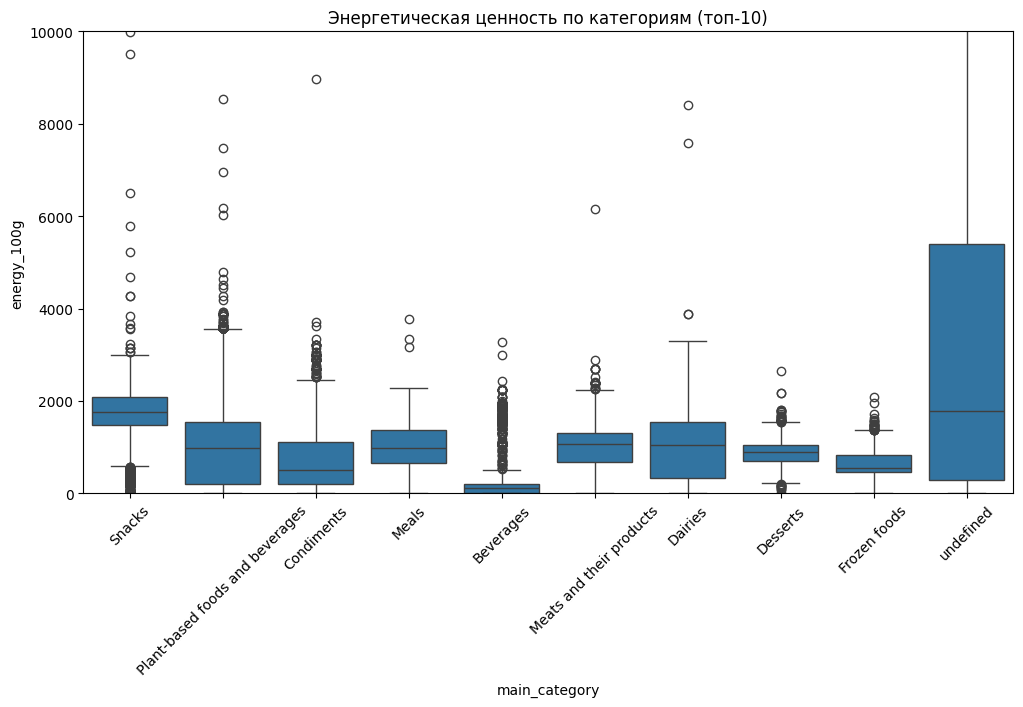

Вызов 2: Географический анализ


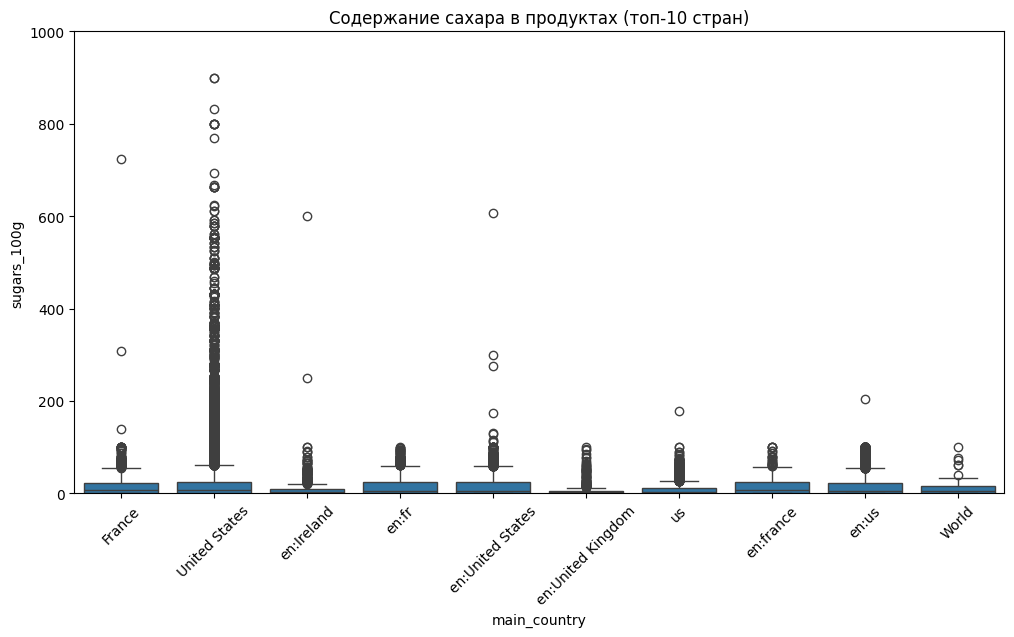

Вызов 3: Собственные выводы


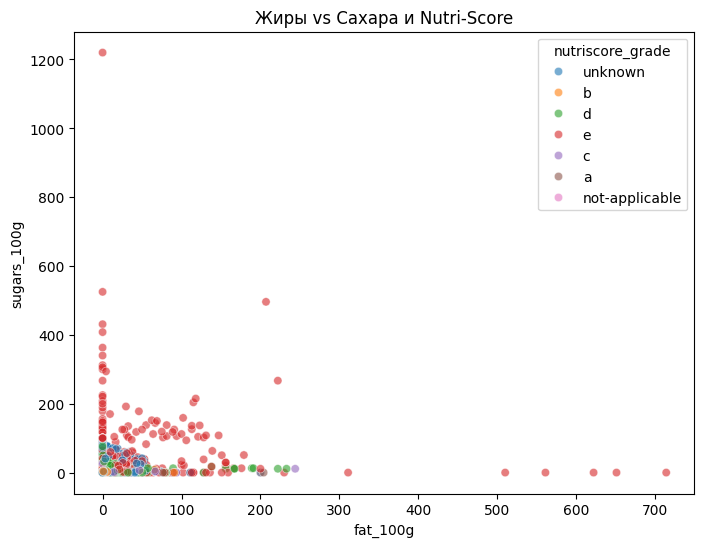

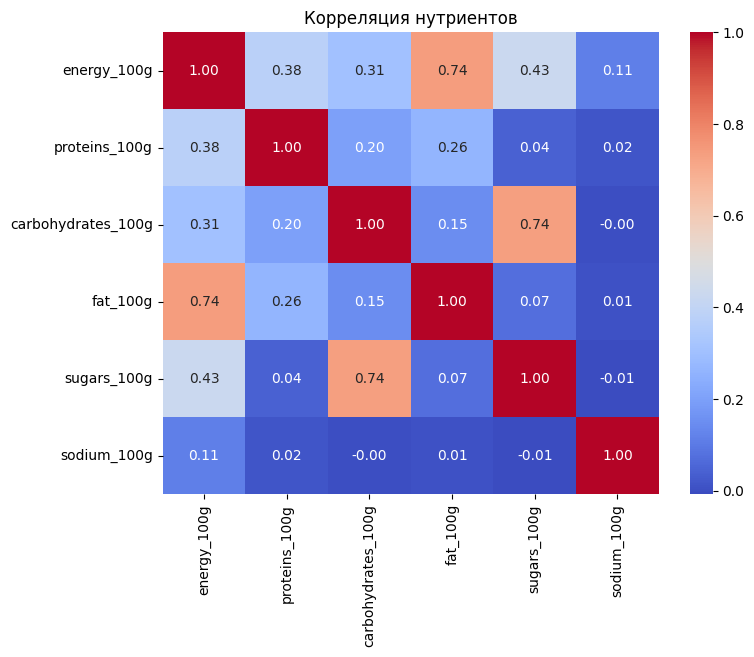

Вызов 4: Интерактивная панель
💡 Советы для вызовов:
1. Начните с исследования и очистки данных
2. Выберите подходящую визуализацию для вашего вопроса
3. Всегда интерпретируйте ваши результаты
4. Учитывайте вашу аудиторию при проектировании графиков
5. Не забывайте правильно обрабатывать пропущенные данные


In [29]:
# Пространство для упражнений-вызовов
# Используйте эту ячейку и создайте дополнительные ячейки ниже для ваших решений вызовов

# Пространство для упражнений-вызовов

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Вызов 1: Анализ категорий")

df['main_category'] = df['categories'].str.split(',').str[0].str.strip()

top_categories = df['main_category'].value_counts().head(10).index
df_cat = df[df['main_category'].isin(top_categories)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_cat, x="main_category", y="energy_100g")
plt.xticks(rotation=45)
plt.ylim(0, 10000)
plt.title("Энергетическая ценность по категориям (топ-10)")
plt.show()

print("Вызов 2: Географический анализ")

df['main_country'] = df['countries'].str.split(',').str[0].str.strip()

top_countries = df['main_country'].value_counts().head(10).index
df_geo = df[df['main_country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_geo, x="main_country", y="sugars_100g")
plt.xticks(rotation=45)
plt.ylim(0, 1000)
plt.title("Содержание сахара в продуктах (топ-10 стран)")
plt.show()

print("Вызов 3: Собственные выводы")

plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(3000, random_state=42), 
                x="fat_100g", y="sugars_100g", 
                hue="nutriscore_grade", alpha=0.6)
plt.title("Жиры vs Сахара и Nutri-Score")
plt.show()

nutrition_vars = ["energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g", "sugars_100g", "sodium_100g"]
plt.figure(figsize=(8,6))
sns.heatmap(df[nutrition_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция нутриентов")
plt.show()

print("Вызов 4: Интерактивная панель")

import plotly.express as px

df_sample = df.sample(5000, random_state=42)

fig = px.scatter(df_sample, 
                 x="energy_100g", y="proteins_100g", 
                 color="nutriscore_grade",
                 hover_data=["product_name", "main_category", "main_country"],
                 facet_col="nutriscore_grade",
                 title="Интерактивный анализ: Энергия vs Белки")


print("💡 Советы для вызовов:")
print("1. Начните с исследования и очистки данных")
print("2. Выберите подходящую визуализацию для вашего вопроса")  
print("3. Всегда интерпретируйте ваши результаты")
print("4. Учитывайте вашу аудиторию при проектировании графиков")
print("5. Не забывайте правильно обрабатывать пропущенные данные")

## Резюме и рефлексия

### Что вы практиковали:
**Загрузка и очистка данных** - Работа с реальными грязными данными  
**Базовая визуализация** - Диаграммы рассеяния, коробчатые диаграммы, скрипичные диаграммы  
**Продвинутые техники** - Парные графики, кривые Эндрюса, параллельные координаты, RadViz  
**Статистический анализ** - KDE, анализ распределений, обнаружение выбросов  
**Многомерный анализ** - Исследование сложных взаимосвязей  

### Ключевые выводы:
1. **Реальные данные грязные** - очистка критически важна для осмысленного анализа
2. **Множественные перспективы важны** - разные графики раскрывают разные выводы  
3. **Цветовое кодирование мощно** - категориальные переменные добавляют глубину анализу
4. **Продвинутые техники** - полезны для сложных многомерных взаимосвязей
5. **Контекст имеет значение** - доменные знания помогают интерпретировать результаты

### Следующие шаги:
- Попробуйте с различными датасетами (данные ВОЗ о здоровье, экономические показатели и т.д.)
- Изучите библиотеки интерактивной визуализации (Plotly, Bokeh)
- Исследуйте статистическое тестирование наряду с визуализацией
- Практикуйте рассказывание историй с данными для презентаций

### Ресурсы для дальнейшего изучения:
- **Документация Seaborn:** https://seaborn.pydata.org/
- **Галерея Matplotlib:** https://matplotlib.org/gallery/
- **Визуализация Pandas:** https://pandas.pydata.org/docs/user_guide/visualization.html
- **Книги по визуализации данных:** "The Grammar of Graphics", "Storytelling with Data"

## Дополнительные учебные материалы

### Если вы хотите углубить знания:

**Книги:**
- "The Grammar of Graphics" - Leland Wilkinson (теоретические основы)
- "Storytelling with Data" - Cole Nussbaumer Knaflic (практические советы)
- "Data Visualization: A Practical Introduction" - Kieran Healy

**Онлайн ресурсы:**
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) - официальное руководство
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/) - примеры графиков
- [Python Graph Gallery](https://python-graph-gallery.com/) - коллекция графиков с кодом

**Видео курсы:**
- Data Visualization with Python на Coursera
- Matplotlib и Seaborn на YouTube
- "Fundamentals of Data Visualization" на edX

**Практические проекты:**
- Анализ данных Kaggle competitions
- Визуализация открытых данных правительства
- Создание дашбордов для бизнес-анализа

### Следующие темы для изучения:
1. **Интерактивная визуализация:** Plotly, Bokeh, Altair
2. **Веб-дашборды:** Streamlit, Dash
3. **Географическая визуализация:** Folium, GeoPandas
4. **Статистическая визуализация:** Корреляционный анализ, регрессия
5. **Большие данные:** Datashader для работы с миллионами точек